**Bitcoin Price Sentiment Analysis**

In [1]:
pip install pandas beautifulsoup4 requests

In [2]:
!pip install apscheduler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [29]:
# Function to get the Bitcoin price from CoinMarketCap
def get_bitcoin_price():
    url = 'https://coinmarketcap.com/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Locate the price element (Update the selector based on the actual page structure)
    price_element = soup.find('div', class_='sc-fa25c04c-0 eAphWs')


    if price_element:
        price = price_element.text
        return float(price.replace('$', '').replace(',', ''))  # Convert price to float
    else:
        raise ValueError('Price element not found')

# Example previous price
previous_price = 15000.00  # Example initial previous price for Bitcoin

# Function to analyze sentiment based on price change
def analyze_sentiment(previous, current):
    # Calculate the percentage change
    change_percentage = ((current - previous) / previous) * 100

    # Define even smaller thresholds for sentiment analysis
    if change_percentage == previous:
        return 'Neutral'
    elif change_percentage > 0.1:  # Threshold for positive sentiment
        return 'Positive'
    elif change_percentage < -0.1:  # Threshold for negative sentiment
        return 'Negative'
    else:
        return 'Neutral'

# Get the current price and analyze sentiment
current_price = get_bitcoin_price()
sentiment = analyze_sentiment(previous_price, current_price)

# Print the result
print(f'Bitcoin Price: ${current_price:.2f}, Sentiment: {sentiment}')

# Save data to CSV file
data = {
    'Date': [pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')],
    'Bitcoin Price': [current_price],
    'Sentiment': [sentiment]
}
df = pd.DataFrame(data)
df.to_csv('bitcoin_price_data.csv', mode='a', header=False, index=False)


Bitcoin Price: $196.07, Sentiment: Negative


In [30]:
current_price = get_bitcoin_price()
print(f'Current Bitcoin Price: ${current_price:.2f}')

Current Bitcoin Price: $196.07


In [31]:
from apscheduler.schedulers.background import BackgroundScheduler

# Function to be scheduled
def scheduled_job():
    current_price = get_bitcoin_price()
    sentiment = analyze_sentiment(previous_price, current_price)

    # Save data to CSV file
    data = {
        'Date': [pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')],
        'Bitcoin Price': [current_price],
        'Sentiment': [sentiment]
    }
    df = pd.DataFrame(data)
    df.to_csv('bitcoin_price_data.csv', mode='a', header=False, index=False)

# Schedule the job to run every minute
scheduler = BackgroundScheduler()
scheduler.add_job(scheduled_job, 'interval', minutes=1)
scheduler.start()


In [32]:
# Keep the script running
try:
    while True:
        time.sleep(1)
except (KeyboardInterrupt, SystemExit):
    # Stop the scheduler and quit
    scheduler.shutdown()



In [34]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('bitcoin_price_data.csv', names=['Date & Time', 'Bitcoin Price', 'Sentiment'])

# Display the first few rows
print(data)

           Date & Time  Bitcoin Price Sentiment
0  2025-12-12 11:33:51         195.81  Negative
1  2025-12-12 11:34:52         195.86  Negative
2  2025-12-12 11:36:25         195.86  Negative
3  2025-12-12 11:37:19         196.08  Negative
4  2025-12-12 11:39:52         196.07  Negative


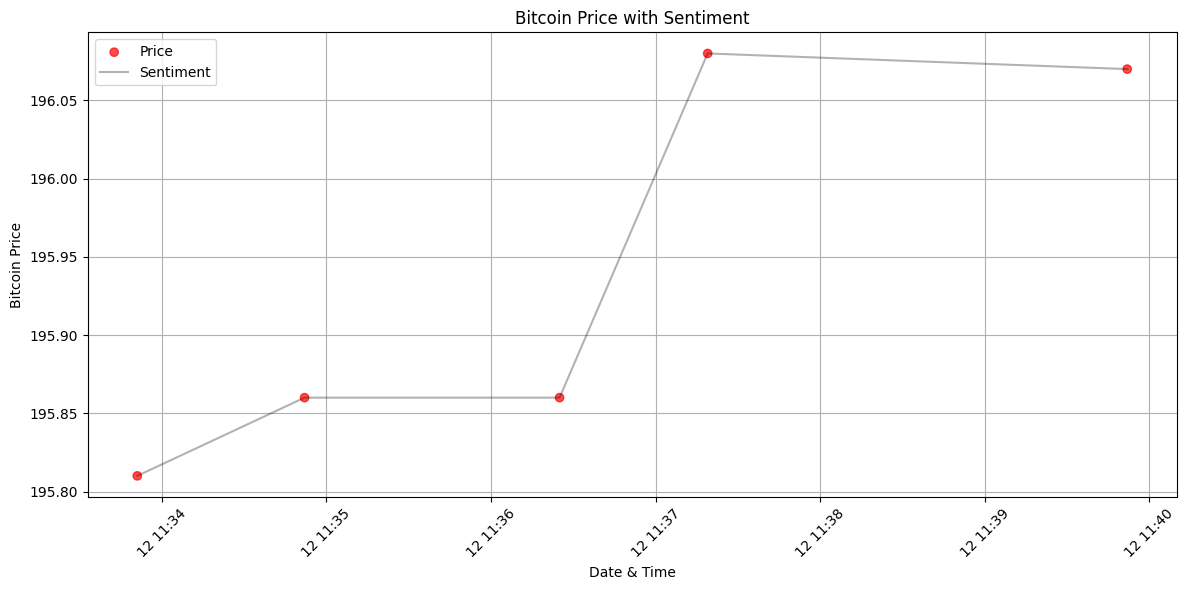

In [35]:
import matplotlib.pyplot as plt
# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Date & Time' to datetime
df['Date & Time'] = pd.to_datetime(df['Date & Time'])

# Map sentiment to numeric values for plotting
sentiment_colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}
df['Sentiment Color'] = df['Sentiment'].map(sentiment_colors)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Date & Time'], df['Bitcoin Price'], c=df['Sentiment Color'], label='Sentiment', alpha=0.7)
plt.plot(df['Date & Time'], df['Bitcoin Price'], color='black', alpha=0.3)  # Line plot for trend
plt.title('Bitcoin Price with Sentiment')
plt.xlabel('Date & Time')
plt.ylabel('Bitcoin Price')
plt.legend(['Price', 'Sentiment'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()